In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.testing.compare import compare_images
from numpy.testing import (assert_equal, assert_almost_equal, 
                           assert_array_equal, assert_allclose, assert_raises)
%matplotlib inline

## Problem 1
Create a function `peel` that accepts a square data frame `df` and returns a data frame with the outer square removed. The original data frame should be unchanged.

**Example:**

Original data:

| a | b | c | d |
|---|---|---|---|
| 1 | 2 | 3 | 4 |
| 5 | 6 | 7 | 8 |
| 9 | 10 | 11 | 12 |
| 13| 14 | 15 | 16 |

Outer removed:

| b | c |
|---|---|
| 6 | 7 |
| 10 | 11|

In [ ]:
def peel(df):
    """
    Remove outer square of dataframe
    
    Original dataframe is not unchanged. Return modified copy of df.
    
    Parameters
    ----------
    df : pandas DataFrame
    
    Returns
    -------
    pandas DataFrame
        modified copy of original dataframe where the outer square is removed
    """
    return df.drop(
        columns=[df.columns[0],df.columns[-1]]).drop([0, len(df)-1]
                                                    )

In [ ]:
inp = [[i + j*2 for i in range(2)] for j in range(2)]
df = pd.DataFrame(inp)
res = peel(df)
assert_equal(type(res), pd.DataFrame)
assert res is not df
assert_equal(res.index.tolist(), [])
assert_equal(res.columns.tolist(), [])

inp = [[i + j*4 for i in range(4)] for j in range(4)]
df = pd.DataFrame(inp)
res = peel(df)
assert_equal(type(res), pd.DataFrame)
assert res is not df
assert_equal(res[1].tolist(), [5, 9])
assert_equal(res[2].tolist(), [6, 10])

## Problem 2
Create a function `patch` that accepts a `DataFrame` `df`, a tuple `upper_left` which contains an index and a column name, and `lst`, which is an $m \times n$ Python list. The function should modify `df` by assigning the values of `lst` with the (0, 0) index of the list corresponding to `upper_left`.

Example:

    >>> df

| &nbsp; | a | b | c | d | e | f |
|---|---|---|---|---|---|---|
| a | 0 | 1 | 2 | 3 | 4 | 5 |
| b | 0 | 1 | 2 | 3 | 4 | 5 |
| c | 0 | 1 | 2 | 3 | 4 | 5 |
| d | 0 | 1 | 2 | 3 | 4 | 5 |
| e | 0 | 1 | 2 | 3 | 4 | 5 |

    >>> patch(df, ('c', 'e'), [[11, 12], [13, 14]])

| &nbsp; | a | b | c | d | e | f |
|---|---|---|---|---|---|---|
| a | 0 | 1 | 2 | 3 | 4 | 5 |
| b | 0 | 1 | 2 | 3 | 4 | 5 |
| c | 0 | 1 | 2 | 3 | 11 | 12 |
| d | 0 | 1 | 2 | 3 | 13 | 14 |
| e | 0 | 1 | 2 | 3 | 4 | 5 |

In [4]:
def patch(df, upper_left, lst):
    """
    Modify dataframe 
    
    Assign the values of lst with the (0, 0) index of the list corresponding 
    to upper_left.
    
    Parameters
    ----------
    df : pandas DataFrame
    
    upper_left : tuple
        contains index and column 
    lst : list
        m x n list
    
    Returns
    -------
    pandas DataFrame
        modified dataframe
    """
    
    d1 = dict((x,y) for (y,x) in enumerate(df.columns))
    d2 = dict(enumerate(df.columns))
    
    ix_row = df.index.to_list().index(upper_left[0])

    for i in range(len(lst)):
        
        df.iloc[ix_row:ix_row+1, d1[upper_left[1]]:
                 d1[upper_left[1]]+d1[d2[len(lst[i])]]] = lst[i]
        ix_row += 1

    return df

In [5]:
df = pd.DataFrame([[i + j*5 for i in range(5)] for j in range(5)],
                  columns=list('abcde'),
                  index=list('abcde'))
try:
    patch(df, ('d', 'd'), [[1, 2, 3], [4, 5, 6]])
    raise AssertionError
except ValueError:
    pass
assert_array_equal(
    df.to_numpy(),
    [[0, 1, 2, 3, 4], 
     [5, 6, 7, 8, 9],
     [10, 11, 12, 13, 14], 
     [15, 16, 17, 18, 19],
     [20, 21, 22, 23, 24]])
patch(df, ('b', 'c'), [[1, 2], [3, 4]])
assert_array_equal(
    df.to_numpy(), 
    [[0, 1, 2, 3, 4], 
     [5, 6, 1, 2, 9],
     [10, 11, 3, 4, 14], 
     [15, 16, 17, 18, 19],
     [20, 21, 22, 23, 24]])

## Problem 3 [2 pts]
Create a function `pop_stats` that accepts three parameters, `province` (required), `municipality` (optional) and `census_year` (defaults to 2015) and reads `Municipality Data - PSA.csv`. The function should:
1. Return the population for the given municipality if `municipality` is given, for that `census_year`. doesn't matter if the `is_total` column is equal to one.
1. Return the total population, mean population, and unbiased standard deviation for that `province` on that `census_year` if `municipality` is not given
1. Return `None` when the given province, municipality, and/or census_year is not available

Notes:
1. rows with `is_total` = 1 correspond to the total population (excluding the cities) as computed by the Philippines Statistics Authority (PSA). Do not forget to remove these rows when calculating provincial statistics.
1. Use only exact, but case-insensitive, matches for `province` and `municipality`.

In [377]:
# YOUR CODE HERE
def pop_stats(province, municipality=None, census_year=2015):
    """
    Compute population statistics of given parameters.
    
    Read Municipality Data - PSA.csv. Return population for a given 
    municipality if municipality is given,for that census_year. Include 
    is_total column values equal to 1. If municipality is not given, return 
    total population, mean population, and unbiased standard deviation for the
    given province on that census_year. Return None when the given province, 
    municipality, and/or census_year is not available. For calculating 
    provincial statistics, do not include rows with is_total column values 
    equal to 1 in the computations. Use exact, but case_insensitive, matches 
    for province and municipality
    
    Parameters
    ----------
    province : str
    
    municipality : str
        
    census_year : int

    
    Returns
    -------
    tuple
        total, mean, and unbiased standard deviation of population statistics
        if municipality is not given.
    int
        total population if municipality is given.
    
    None
        if given province, municipality, and/or census_year is not available.
    """
    if municipality is not None:
        liz = [
            str(census_year)[-2:] in [i[-2:] for i in df3.columns[2:-1]], 
            len(df3[df3.province.str.lower()== province.lower()])!=0, 
            len(df3[df3.municipality.str.lower()== municipality.lower()])!=0
        ]
    else:
        liz = [
            str(census_year)[-2:] in [i[-2:] for i in df3.columns[2:-1]], 
            len(df3[df3.province.str.lower()== province.lower()])!=0, 
        ]

    if not all(liz):
        return None

    elif municipality:
        province = province.lower()
        municipality = municipality.lower()


        df3_copy = df3[(df3['province'].str.lower()==province)].copy()
        melted = pd.melt(df3_copy, id_vars='municipality',
                         value_vars=df3.columns[2:-1])
        
        melted = melted[melted['variable'].str.contains(
            str(census_year)[-2:])]
        
        melted.municipality = melted.municipality.str.lower()

        return melted.groupby('municipality')['value'].sum()[municipality]    

    elif not municipality:
        province = province.lower()

        df3_copy = df3[(df3['province'].str.lower()==province) & 
                       (df3['is_total']!=1)].copy()

        melted = pd.melt(df3_copy, id_vars='province',
                         value_vars=df3.columns[2:-1])
        
        melted = melted[melted['variable'].str.contains(
            str(census_year)[-2:])]
        return (melted.value.sum(),melted.value.mean(),melted.value.std())

   

In [6]:
df3 = pd.read_csv('Municipality Data - PSA.csv')
df3.head()

,province,municipality,Feb-60,May-70,May-75,May-80,May-90,Sep-95,May-00,Aug-07,May-10,Aug-15,is_total
0,Abra,ABRA,115193.0,145058.0,147010.0,160198.0,184743.0,195964.0,209491.0,230953.0,234733.0,241160.0,1
1,Abra,BANGUED (CAPITAL),19368.0,24587.0,25597.0,28666.0,34184.0,35450.0,38965.0,46179.0,43936.0,48163.0,0
2,Abra,BOLINEY,2326.0,3175.0,2902.0,3060.0,3773.0,3156.0,3340.0,3349.0,4063.0,3573.0,0
3,Abra,BUCAY,7473.0,9937.0,11337.0,12375.0,13346.0,14499.0,14881.0,16266.0,17126.0,17115.0,0
4,Abra,BUCLOC,1152.0,1401.0,1447.0,1605.0,1932.0,1919.0,2109.0,2227.0,2176.0,2501.0,0


In [146]:
###### province + municipality + year (1 pt)
assert_equal(pop_stats('nowhere', 'here'), None)
assert_allclose([1003874], pop_stats('cebu', 'cebu *', 1960))
assert_allclose([1159219], pop_stats('cebu', 'cebu *', 1970))
assert_allclose([1249997], pop_stats('cebu', 'cebu *', 1975))
assert_allclose([1392008], pop_stats('cebu', 'cebu *', 1980))
assert_allclose([1709621], pop_stats('cebu', 'cebu *', 1990))
assert_allclose([1890357], pop_stats('cebu', 'cebu *', 1995))
assert_allclose([2160569], pop_stats('cebu', 'cebu *', 2000))
assert_allclose([2440120], pop_stats('cebu', 'cebu *', 2007))

In [147]:
# province + year (1pt)
assert_equal(pop_stats('nowhere'), None)
assert_allclose(
    (1003874.0, 20077.48, 11161.161844722154),
    pop_stats('cebu', census_year=1960))
assert_allclose(
    (1634182.0, 30833.622641509435, 46759.34840354486),
    pop_stats('cebu', census_year=1970))
assert_allclose(
    (1818410.0, 34309.622641509435, 55704.498499543384),
    pop_stats('cebu', census_year=1975))
assert_allclose(
    (2091602.0, 39464.188679245286, 66916.20563897479),
    pop_stats('cebu', census_year=1980))
assert_allclose(
    (2640574.0, 49822.15094339623, 85111.4950761186),
    pop_stats('cebu', census_year=1990))
assert_allclose(
    (2921145.0, 55115.943396226416, 92878.27393492706),
    pop_stats('cebu', census_year=1995))
assert_allclose(
    (3356137.0, 63323.339622641506, 103562.46715870487),
    pop_stats('cebu', census_year=2000))
### START HIDDEN TESTS
assert np.isclose((3850989.0, 72660.16981132075, 118416.94901584236),
                  pop_stats('cebu', census_year=2007), 2).all()
assert np.isclose((4167320.0, 78628.67924528301, 129236.65175706119),
                  pop_stats('cebu', census_year=2010), 2).all()
assert np.isclose((4632359.0, 87403.0, 139829.91182036948),
                  pop_stats('cebu', census_year=2015), 2).all()

## Problem 4
Create a function `plot_pop` that accepts a list of (case-insensitive) municipality names, reads `Municipality Data - PSA.csv` and returns a `matplotlib` `Figure` that replicates the figure below. It is composed of superimposed line graphs with the $x$-axis being the census date and $y$-axis corresponding to the population. No need to convert the census dates into datetime.

![](pop.png)

In [413]:
def plot_pop(municipalities):
    """
    Plots superimposed line graphs 
    
    Read Municipality Data - PSA.csv and return a matplotlib Figure that 
    replicates the figure given. It is composed of superimposed line graphs 
    with the  𝑥 -axis being the census date and  𝑦 -axis corresponding to the 
    population. No need to convert the census dates into datetime.


    Parameters
    ----------
    municipalities : list
        list of municipalities
    
    Returns
    -------
    matplotlib.axes._subplots.AxesSubplot
        superimposed line graphs

    """
    df4 = pd.read_csv('Municipality Data - PSA.csv')

    municipalities = ['CiTy Of MaNiLa', 'City of Makati', 'QUEZON CITY',
                    'city of isabela', 'Angeles City']

    municipalities_upper = [i.upper() for i in municipalities]

    df4 = df4.drop(['province','is_total'], axis=1)

    df4 = (df4[df4['municipality'].isin(municipalities_upper)]
           .set_index('municipality'))

    df4 = df4.reindex(municipalities_upper).T
    df4.columns = municipalities
    return df4.plot.line()
    

In [411]:
df4


municipality,CITY OF MANILA,CITY OF MAKATI,QUEZON CITY,CITY OF ISABELA,ANGELES CITY
Feb-60,1138611.0,114540.0,397990.0,NaN,NaN
May-70,1330788.0,264918.0,754452.0,NaN,134544.0
May-75,1479116.0,334448.0,956864.0,NaN,151164.0
May-80,1630485.0,372631.0,1165865.0,NaN,188834.0
May-90,1601234.0,453170.0,1669776.0,59482.0,236686.0
Sep-95,1654761.0,484176.0,1989419.0,68557.0,234011.0
May-00,1581082.0,471379.0,2173831.0,73032.0,263971.0
Aug-07,1660714.0,567349.0,2679450.0,87985.0,317398.0
May-10,1652171.0,529039.0,2761720.0,97857.0,326336.0
Aug-15,1780148.0,582602.0,2936116.0,112788.0,411634.0


,CiTy Of MaNiLa,City of Makati,QUEZON CITY,city of isabela,Angeles City
Feb-60,1138611.0,114540.0,397990.0,NaN,NaN
May-70,1330788.0,264918.0,754452.0,NaN,134544.0
May-75,1479116.0,334448.0,956864.0,NaN,151164.0
May-80,1630485.0,372631.0,1165865.0,NaN,188834.0
May-90,1601234.0,453170.0,1669776.0,59482.0,236686.0
Sep-95,1654761.0,484176.0,1989419.0,68557.0,234011.0
May-00,1581082.0,471379.0,2173831.0,73032.0,263971.0
Aug-07,1660714.0,567349.0,2679450.0,87985.0,317398.0
May-10,1652171.0,529039.0,2761720.0,97857.0,326336.0
Aug-15,1780148.0,582602.0,2936116.0,112788.0,411634.0


<AxesSubplot:>

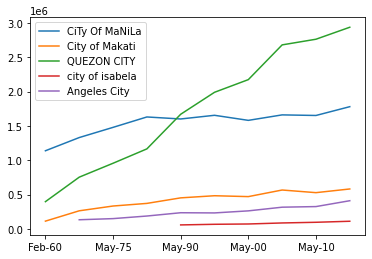

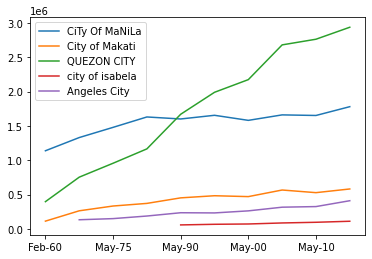

In [414]:
ax = plot_pop(['CiTy Of MaNiLa', 'City of Makati', 'QUEZON CITY',
                'city of isabela', 'Angeles City'])
ax.figure.canvas.draw()
assert_equal(
    [t.get_text() for t in ax.get_xticklabels()], 
    ['May-10', 'Feb-60', 'May-75', 'May-90', 'May-00', 'May-10', '']
)
assert_equal(
    [t.get_text() for t in ax.get_yticklabels()], 
    ['−0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5']
)
assert_equal(
    [t.get_text() for t in ax.legend_.texts],
    ['CiTy Of MaNiLa',
     'City of Makati',
     'QUEZON CITY',
     'city of isabela',
     'Angeles City']
)

## Problem 5
Create a function `find_max` that accepts a `province` (case-insensitive) and reads `Municipality Data - PSA.csv` then returns the municipality and census dates where the change in population is greatest. Raise `ValueError` if `province` is not found.

In [401]:
def find_max(province):
    """
    Get municipality and census dates with the highest change in population.
    
    Read Municipality Data - PSA.csv then returns the municipality and census 
    dates where the change in population is greatest. Raise ValueError if 
    province is not found.


    Parameters
    ----------
    province : str
        case-insensitive province
    
    Returns
    -------
    tuple
        contains municipality, the 2 dates when the change had occured.

    """
    df5 = pd.read_csv('Municipality Data - PSA.csv')
    
    df5 = df5[df5['is_total']!=1].drop('is_total', axis=1)
    
    df5['province'] = df5['province'].str.upper() 
    
    df5 = (df5[df5['province'] == province.upper()]
           .drop('province', axis=1)) 
    
    df5 = df5.set_index('municipality').T
    
    df5_diff = df5.diff()

    ser = df5_diff.abs().max()
    
    max_val = ser.max()

    city_of_max = ser.idxmax()

    date_after_row = df5_diff[df5_diff[city_of_max]==max_val]

    date_after = date_after_row.index[0]
    
    date_list = df5_diff.index.to_list()

    i_before = date_list.index(date_after) - 1

    date_before = date_list[i_before]

    return (city_of_max, date_before, date_after)

In [402]:
assert_raises(ValueError, find_max, 'nowhere')
assert_equal(
    find_max('metropolitan manila'), 
    ('QUEZON CITY', 'May-00', 'Aug-07'))
assert_equal(
    find_max('Pampanga'), 
    ('ANGELES CITY', 'May-10', 'Aug-15'))

## Problem 6

Create a function `most_populous` that reads `Municipality Data - PSA.csv` and returns a `pandas` `Series` of the 10 provinces with the most mean population for `Aug-15`. The index should be the name of the province and the value should be the mean population. Sort them by decreasing mean population.

In [403]:
def most_populous():
    """
    Identify 10 provinces with the most mean population for Aug-15
    
    Read Municipality Data - PSA.csv then return a pandas Series of the 10 
    provinces with the most mean population for Aug-15. The index is the name
    of the province and the value should be the mean population sorted by 
    decreasing mean population.
    
    Returns
    -------
    pandas Series
        contains 10 provinces with the most mean population for Aug-15.

    """
    df6 = pd.read_csv('Municipality Data - PSA.csv')
    df6 = df6[df6['is_total']!=1]
    
    means = df6.groupby('province')['Aug-15'].mean()

    return means.sort_values(ascending=False)[:10] #series

In [292]:
# df6 = pd.read_csv('Municipality Data - PSA.csv')
# df6 = df6[df6['is_total']!=1]
# display(df6)
# means = df6.groupby('province')['Aug-15'].mean()

# return means.sort_values(ascending=False)[:10]

,province,municipality,Feb-60,May-70,May-75,May-80,May-90,Sep-95,May-00,Aug-07,May-10,Aug-15,is_total
1,Abra,BANGUED (CAPITAL),19368.0,24587.0,25597.0,28666.0,34184.0,35450.0,38965.0,46179.0,43936.0,48163.0,0
2,Abra,BOLINEY,2326.0,3175.0,2902.0,3060.0,3773.0,3156.0,3340.0,3349.0,4063.0,3573.0,0
3,Abra,BUCAY,7473.0,9937.0,11337.0,12375.0,13346.0,14499.0,14881.0,16266.0,17126.0,17115.0,0
4,Abra,BUCLOC,1152.0,1401.0,1447.0,1605.0,1932.0,1919.0,2109.0,2227.0,2176.0,2501.0,0
5,Abra,DAGUIOMAN,1003.0,1050.0,1124.0,1254.0,1413.0,1475.0,1748.0,1916.0,1715.0,2088.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Zamboanga Sibugay,ROSELLER LIM,NaN,NaN,NaN,NaN,29325.0,31291.0,34152.0,34952.0,37216.0,43646.0,0
1674,Zamboanga Sibugay,SIAY,14088.0,32922.0,37816.0,17004.0,24689.0,29303.0,32844.0,33902.0,38229.0,41572.0,0
1675,Zamboanga Sibugay,TALUSAN,NaN,NaN,NaN,10477.0,10455.0,15012.0,18394.0,22875.0,25268.0,29969.0,0
1676,Zamboanga Sibugay,TITAY,NaN,19008.0,20005.0,24983.0,31994.0,35065.0,39730.0,43723.0,46456.0,49673.0,0


province
Metropolitan Manila    757485.470588
Rizal                  206016.214286
Davao del Sur          161370.062500
Cavite                 159926.130435
Bulacan                137169.625000
South Cotabato         125811.250000
Pampanga               118624.727273
Laguna                 101169.366667
Negros Occidental       95598.000000
Davao del Norte         92393.818182
Name: Aug-15, dtype: float64

In [404]:
mp = most_populous()
assert_array_equal(
    mp[:5].index,
    ['Metropolitan Manila', 'Rizal', 'Davao del Sur', 'Cavite', 'Bulacan']
)
assert_allclose(
    mp[:5].tolist(),
    [757485.4705882353, 206016.2142857143, 161370.0625, 159926.13043478262, 
     137169.625]
)

## Problem 7

Create a function `hourly_hashtag` that reads the first 1M data lines of `/mnt/data/public/nowplaying-rs/nowplaying_rs_dataset/user_track_hashtag_timestamp.csv` and returns a pandas data frame with columns `hashtag`, `created_at` and `count`. The input `created_at` column is in UTC. The `count` column contains the number of `created_at`, binned hourly and in Philippine time, for that `hashtag`. Sort by `hashtag` then by `created_at`. 

In [405]:
def hourly_hashtag():
    """
    Return a pandas data frame with columns hashtag, created_at and count.
    
    Read the first 1M data lines of /mnt/data/public/nowplaying-rs/
    nowplaying_rs_dataset/user_track_hashtag_timestamp.csv and return a 
    pandas data frame with columns hashtag, created_at and count. The input 
    created_at column is in UTC. The count column contains the number of 
    created_at, binned hourly and in Philippine time, for that hashtag. 
    The dataframe is sorted by hashtag then by created_at.
    
    Returns
    -------
    pandas DataFrame
        

    """
    df7 = pd.read_csv('/mnt/data/public/nowplaying-rs/nowplaying_rs_dataset/'
                      'user_track_hashtag_timestamp.csv', nrows=1000000)
    
    df7.created_at = (pd.to_datetime(df7.created_at, utc=True)
                      .dt.tz_convert('Asia/Manila'))
    
    grouped = df7.groupby(['hashtag', pd.Grouper(key='created_at', freq='H')])
    
    counts_series = grouped['created_at'].count()
    
    df_counts = pd.DataFrame(counts_series)

    df_counts.columns = ['count']
    
    out7 = df_counts.reset_index()
    
    return out7

In [345]:
# df7 = pd.read_csv('/mnt/data/public/nowplaying-rs/nowplaying_rs_dataset/'
#                       'user_track_hashtag_timestamp.csv', nrows=1000000)
    
# df7.created_at = (pd.to_datetime(df7.created_at, utc=True)
#                       .dt.tz_convert('Asia/Manila'))
    
# grouped = df7.groupby(['hashtag', pd.Grouper(key='created_at', freq='H')])

,user_id,track_id,hashtag,created_at
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 13:54:21+08:00
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth,2014-01-01 13:54:21+08:00
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 13:54:21+08:00
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk,2014-01-01 13:54:21+08:00
4,2205686924,da3110a77b724072b08f231c9d6f7534,NowPlaying,2014-01-01 13:54:22+08:00
...,...,...,...,...
999995,158581500,89db138d317d4c9c2d542ea6ad681f70,JalurBebas,2014-02-18 01:20:13+08:00
999996,236337415,eaf0617ea47bb503dfbec8939cfc1f86,NowPlaying,2014-02-18 01:20:13+08:00
999997,463194990,fc56b663f95eee198fc9a7da0e08cc3e,NowPlaying,2014-02-18 01:20:21+08:00
999998,453599409,36581a6338370765416555f5df4a4815,NowPlaying,2014-02-18 01:20:23+08:00


hashtag   created_at               
089DJ     2014-01-05 08:00:00+08:00    1
          2014-01-05 09:00:00+08:00    2
          2014-01-12 08:00:00+08:00    3
          2014-01-12 09:00:00+08:00    4
          2014-01-12 10:00:00+08:00    9
                                      ..
푸른밤종현입니다  2014-02-14 00:00:00+08:00    2
          2014-02-14 01:00:00+08:00    2
          2014-02-17 01:00:00+08:00    2
ｱｸｾﾝｽﾀｰ   2014-01-09 22:00:00+08:00    1
ｵﾍﾟﾗﾏｸﾞﾅ  2014-01-13 23:00:00+08:00    1
Name: created_at, Length: 73050, dtype: int64

,hashtag,created_at,count
0,089DJ,2014-01-05 08:00:00+08:00,1
1,089DJ,2014-01-05 09:00:00+08:00,2
2,089DJ,2014-01-12 08:00:00+08:00,3
3,089DJ,2014-01-12 09:00:00+08:00,4
4,089DJ,2014-01-12 10:00:00+08:00,9
...,...,...,...
73045,푸른밤종현입니다,2014-02-14 00:00:00+08:00,2
73046,푸른밤종현입니다,2014-02-14 01:00:00+08:00,2
73047,푸른밤종현입니다,2014-02-17 01:00:00+08:00,2
73048,ｱｸｾﾝｽﾀｰ,2014-01-09 22:00:00+08:00,1


In [406]:
df_hashtag = hourly_hashtag()
assert_equal(df_hashtag.shape, (73050, 3))
assert_equal(df_hashtag.columns.tolist(), ['hashtag', 'created_at', 'count'])
assert_equal(
    df_hashtag[:10].values.tolist(),
    [['089DJ', pd.Timestamp('2014-01-05 08:00:00+0800', tz='Asia/Manila'), 1],
     ['089DJ', pd.Timestamp('2014-01-05 09:00:00+0800', tz='Asia/Manila'), 2],
     ['089DJ', pd.Timestamp('2014-01-12 08:00:00+0800', tz='Asia/Manila'), 3],
     ['089DJ', pd.Timestamp('2014-01-12 09:00:00+0800', tz='Asia/Manila'), 4],
     ['089DJ', pd.Timestamp('2014-01-12 10:00:00+0800', tz='Asia/Manila'), 9],
     ['089DJ', pd.Timestamp('2014-01-12 11:00:00+0800', tz='Asia/Manila'), 4],
     ['0_Count', pd.Timestamp('2014-01-07 18:00:00+0800', tz='Asia/Manila'), 
      1],
     ['1038FM', pd.Timestamp('2014-01-05 22:00:00+0800', tz='Asia/Manila'), 
      1],
     ['1093KFKU', pd.Timestamp('2014-01-01 14:00:00+0800', tz='Asia/Manila'),
      2],
     ['1093KFKU', pd.Timestamp('2014-01-01 19:00:00+0800', tz='Asia/Manila'), 
      1]]
)

## Problem 8

Create a function `aisle_counts` that reads the first 1M data lines of `/mnt/data/public/instacart/instacart_2017_05_01/order_products__prior.csv` and returns a `pandas` `Series` of the number of orders per aisle sorted by decreasing number of orders. Hint: you should look at other files in the directory that you can use.

In [361]:
def aisle_counts():
    """
    Return a pandas Series of the number of orders per aisle 
    
    Read the first 1M data lines of /mnt/data/public/instacart/instacart_2017
    _05_01/order_products__prior.csv and return a pandas Series of the number
    of orders per aisle sorted by decreasing number of orders. 
   
    
    Returns
    -------
    pandas Series
        contains the number of orders per aisle sorted by decreasing number of
        orders. 

    """
    order_df = pd.read_csv('/mnt/data/public/instacart/instacart_2017_05_01'
                           '/order_products__prior.csv', nrows=1000000)
    
    product_df = pd.read_csv('/mnt/data/public/instacart/instacart_2017_05_01'
                             '/products.csv', usecols=['product_id','aisle_id'])
    
    aisles_df = pd.read_csv('/mnt/data/public/instacart/instacart_2017_05_01/'
                            'aisles.csv')
    
    product_df = product_df.merge(aisles_df, how='left', on='aisle_id')
    
    order_df = order_df.merge(product_df, how='left', on='product_id')
    
    out8 = (order_df.groupby('aisle')['order_id'].count()
            .sort_values(ascending=False))
    return out8

,product_id,aisle_id,aisle
0,1,61,cookies cakes
1,2,104,spices seasonings
2,3,94,tea
3,4,38,frozen meals
4,5,5,marinades meat preparation
...,...,...,...
49683,49684,124,spirits
49684,49685,42,frozen vegan vegetarian
49685,49686,112,bread
49686,49687,41,cat food care


,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle
0,2,33120,1,1,86,eggs
1,2,28985,2,1,83,fresh vegetables
2,2,9327,3,0,104,spices seasonings
3,2,45918,4,1,19,oils vinegars
4,2,30035,5,0,17,baking ingredients
...,...,...,...,...,...,...
999995,105629,18670,9,1,91,soy lactosefree
999996,105629,7010,10,1,63,grains rice dried goods
999997,105629,3142,11,1,63,grains rice dried goods
999998,105629,28849,12,0,59,canned meals beans


aisle
fresh fruits                  112409
fresh vegetables              105047
packaged vegetables fruits     54781
yogurt                         44674
packaged cheese                30184
                               ...  
kitchen supplies                 271
baby accessories                 247
baby bath body care              236
beauty                           166
frozen juice                     136
Name: order_id, Length: 134, dtype: int64

In [362]:
ac = aisle_counts()
assert_array_equal(
    ac.index[:10],
    ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits',
     'yogurt', 'packaged cheese', 'milk', 'water seltzer sparkling water',
     'chips pretzels', 'soy lactosefree', 'bread']
)
assert_array_equal(
    ac[:10].to_list(),
    [112409, 105047, 54781, 44674, 30184, 27428, 25789, 22190, 19839, 18091]
)

## Problem 9

Create a function `from_to` that reads the first 1000 data lines of `/mnt/data/public/wikipedia/clickstream/clickstream/2017-11/clickstream-enwiki-2017-11.tsv.gz` and returns a `pandas` `DataFrame` where the index are the unique values of the source column (first column) sorted in lexicographical order, the columns are the unique values of the destination column (second column) sorted in lexicographical order and the values are the corresponding views (fourth column). Set the value to 0 if it wasn't viewed.

In [407]:
def from_to():
    """
    Returns a pandas DataFrame
    
    Read the first 1000 data lines of /mnt/data/public/wikipedia/clickstream/
    clickstream/2017-11/clickstream-enwiki-2017-11.tsv.gz and return a pandas
    DataFrame where the index are the unique values of the source column 
    (first column) sorted in lexicographical order, the columns are the unique
    values of the destination column (second column) sorted in lexicographical
    order and the values are the corresponding views (fourth column). Value is
    0 if it wasn't viewed.
   
    
    Returns
    -------
    pandas DataFrame

    """
    df9 = pd.read_csv('/mnt/data/public/wikipedia/clickstream/clickstream/2017-11'
                      '/clickstream-enwiki-2017-11.tsv.gz', nrows=1000, 
                      compression='gzip', sep='\t', usecols=[0,1,3],
                      names=['source','destination','views'])

    piv9 = df9.pivot(index='source', columns='destination', values='views').fillna(0)
    
    return piv9

In [408]:
df_ft = from_to()
assert_equal(df_ft.shape, (621, 171))
assert_array_equal(
    df_ft.index[:10],
    ['1._FSV_Mainz_05', '13_Reasons_Why', '1939_in_film', '1970_in_music',
     '1976_Formula_One_season', '1976_in_Irish_television',
     '1977_in_Ireland', '1977_in_television', '1980s', '1990_in_film']
)
assert_array_equal(
    df_ft.columns[:10],
    ['1921_Navy_Midshipmen_football_team', '1927_in_Turkey',
     '1947–48_Scottish_Division_Three', '1958_in_association_football',
     '1977_in_Irish_television',
     "2002_Pan_Pacific_Swimming_Championships_–_Women's_50_metre_freestyle",
     '2010_Sony_Ericsson_Open', '2011_UCI_World_Tour',
     '2012_Oregon_State_Beavers_football_team',
     '2015_World_Polo_Championship']
)